# Data Exploration

Chosen Dataset: tic-tac-toe

In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
df = pd.read_csv(filepath_or_buffer='./tic-tac-toe.data', header = None)
df.columns = ['one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'outcome']
df.head()

,one,two,three,four,five,six,seven,eight,nine,outcome
0,x,x,x,x,o,o,x,o,o,positive
1,x,x,x,x,o,o,o,x,o,positive
2,x,x,x,x,o,o,o,o,x,positive
3,x,x,x,x,o,o,o,b,b,positive
4,x,x,x,x,o,o,b,o,b,positive


In [77]:
#The columns relate to the position on the board. One two and three are the top three squares and the next numbers follow the
#the same pattern. The outcome relates to whether x wins or not. Postive means that x has won, negative means that o has won.

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958 entries, 0 to 957
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   one      958 non-null    object
 1   two      958 non-null    object
 2   three    958 non-null    object
 3   four     958 non-null    object
 4   five     958 non-null    object
 5   six      958 non-null    object
 6   seven    958 non-null    object
 7   eight    958 non-null    object
 8   nine     958 non-null    object
 9   outcome  958 non-null    object
dtypes: object(10)
memory usage: 75.0+ KB


In [79]:
#This data set does not have any null values. However as seen, the attributes are all objects and thus need to be accomodated
#for classification. To do this, we will use one hot encoding.

In [80]:
X = df

encoded = pd.get_dummies(df.one, prefix = 'one').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('one', axis = 1, inplace=True)

encoded = pd.get_dummies(df['two'], prefix = 'two').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('two', axis = 1, inplace=True)

encoded = pd.get_dummies(df['three'], prefix = 'three').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('three', axis = 1, inplace=True)

encoded = pd.get_dummies(df['four'], prefix = 'four').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('four', axis = 1, inplace=True)

encoded = pd.get_dummies(df['five'], prefix = 'five').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('five', axis = 1, inplace=True)

encoded = pd.get_dummies(df['six'], prefix = 'six').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('six', axis = 1, inplace=True)

encoded = pd.get_dummies(df['seven'], prefix = 'seven').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('seven', axis = 1, inplace=True)

encoded = pd.get_dummies(df['eight'], prefix = 'eight').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('eight', axis = 1, inplace=True)

encoded = pd.get_dummies(df['nine'], prefix = 'nine').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('nine', axis = 1, inplace=True)

encoded = pd.get_dummies(df['outcome'], prefix = 'outcome').iloc[:, 1:]
X = pd.concat([X,encoded], axis = 1)
X.drop('outcome', axis = 1, inplace=True)
X.head()

,one_o,one_x,two_o,two_x,three_o,three_x,four_o,four_x,five_o,five_x,six_o,six_x,seven_o,seven_x,eight_o,eight_x,nine_o,nine_x,outcome_positive
0,0,1,0,1,0,1,0,1,1,0,1,0,0,1,1,0,1,0,1
1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,1,1,0,1
2,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,0,1,1
3,0,1,0,1,0,1,0,1,1,0,1,0,1,0,0,0,0,0,1
4,0,1,0,1,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1


In [81]:
#This data does not need to be scaled either because since all of the values are categorical, they are all 0's or 1's. They
#already fit into min max scaling.

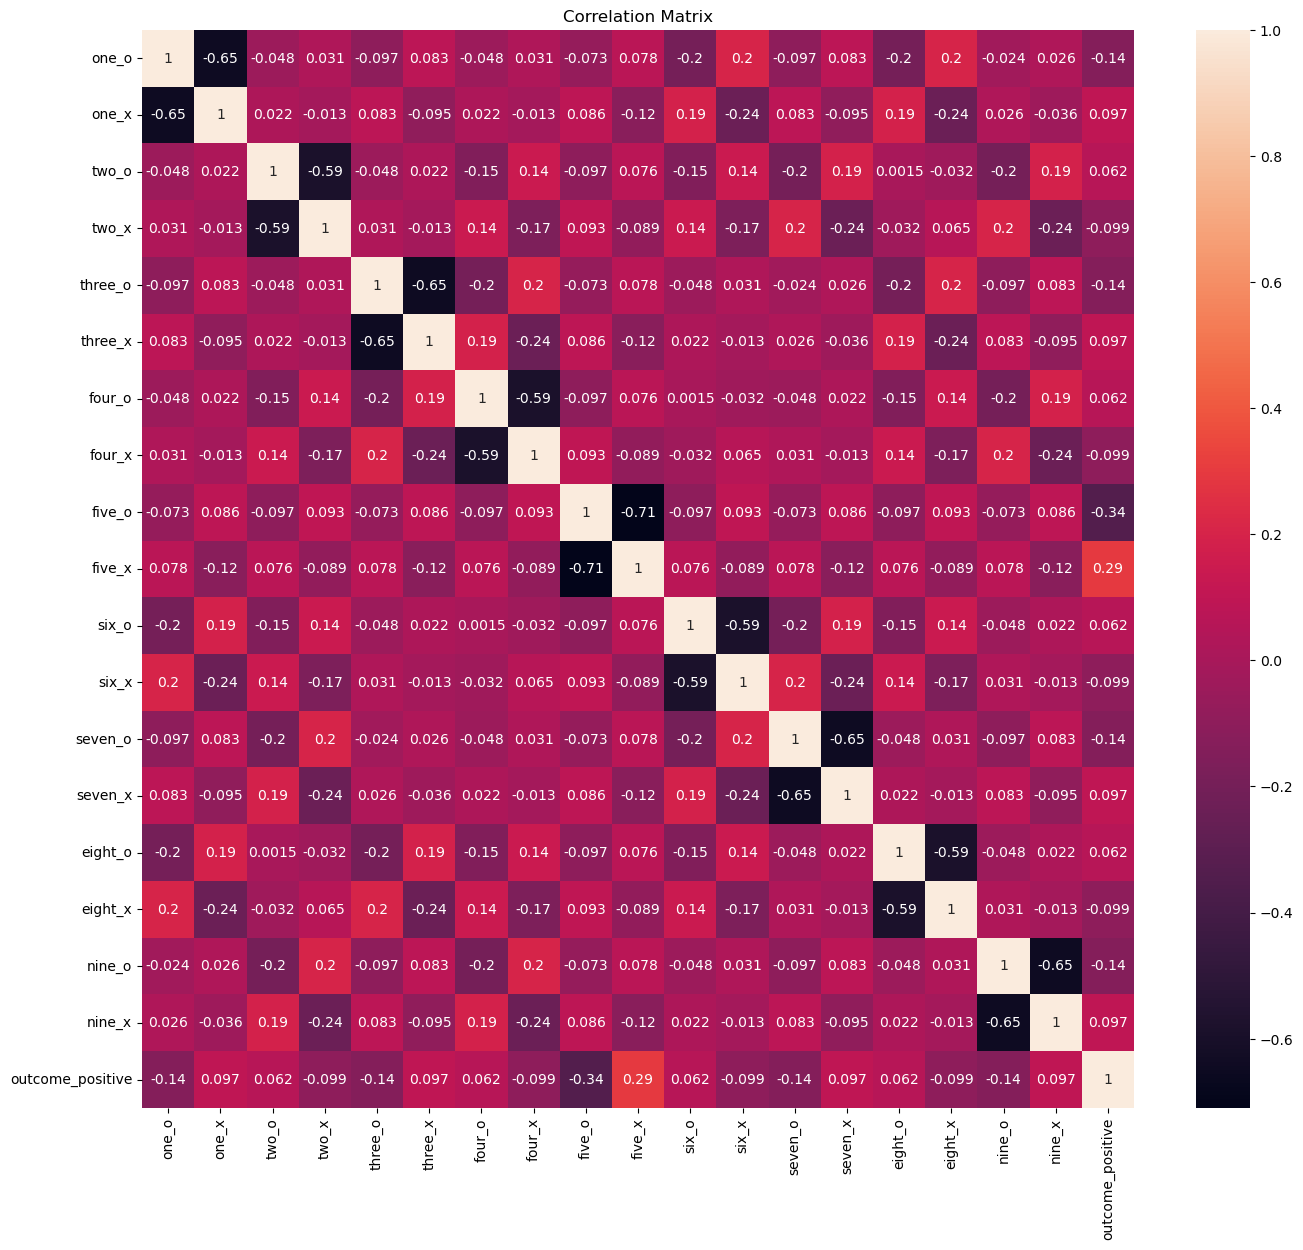

In [82]:
plt.figure(figsize=(16,14))

sns.heatmap(X.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

In [83]:
class_labels = ['O/Draw', 'X Win']

In [84]:
#As expected, the one hot encoding added a little bit of collinearity because of the nature of the one hot encoding. However,
#the other columns are not related to each other.

In [85]:
from sklearn.model_selection import train_test_split

y = X[['outcome_positive']]
X = X[['one_o', 'one_x', 'two_o', 'two_x', 'three_o', 'three_x', 'four_o','four_x', 'five_o','five_x', 'six_o','six_x','seven_o','seven_x', 'eight_o','eight_x', 'nine_o','nine_x']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [86]:
from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=1000)
logmodel.fit(X_train,y_train)

c:\Users\bietv\anaconda3\envs\ds\lib\site-packages\sklearn\utils\validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=1000)

In [87]:
predictions = logmodel.predict(X_test)

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96       103
           1       0.96      1.00      0.98       185

    accuracy                           0.98       288
   macro avg       0.98      0.97      0.97       288
weighted avg       0.98      0.98      0.98       288

[[ 96   7]
 [  0 185]]


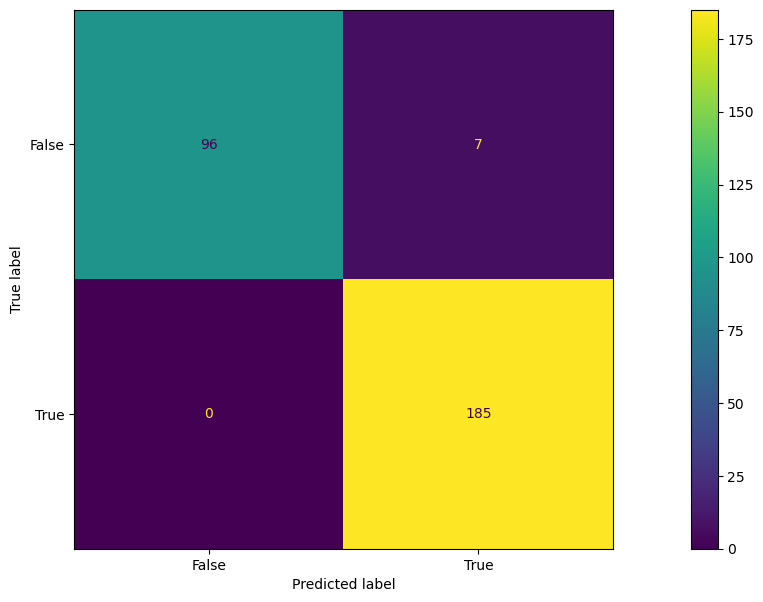

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay

matrix = confusion_matrix(y_test, predictions)

cm_display = ConfusionMatrixDisplay(confusion_matrix = matrix, display_labels = [False, True])

cm_display.plot()

cm_display.ax_.grid(False)
plt.show()

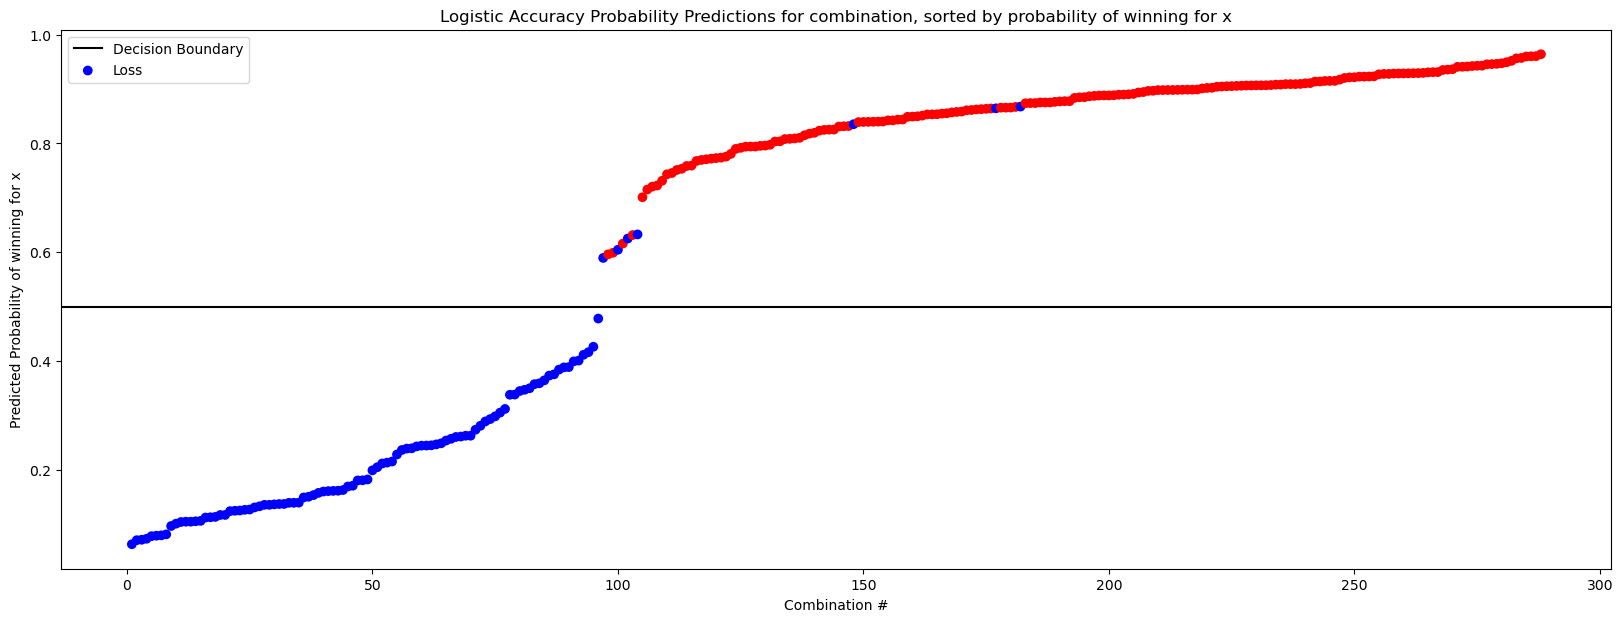

In [90]:
yvalues = logmodel.predict_proba(X_test)[:,1]

colors = ['b' if label == 0 else 'r' for label in y_test["outcome_positive"]]

colors = [x for _,x in sorted(zip(yvalues,colors))]

yvalues.sort()

x = np.linspace(1,len(yvalues),len(yvalues))

plt.axhline(y = 0.5, color = 'black', linestyle = '-', label='Decision Boundary')
plt.scatter(x, yvalues, c = colors, label='Loss')
plt.xlabel("Combination #")
plt.ylabel("Predicted Probability of winning for x")
plt.title("Logistic Accuracy Probability Predictions for combination, sorted by probability of winning for x")
plt.legend()
plt.show()

In [91]:
#As we can see with the confusion matrix and visual representation of the logistic model, the model works quite well at
#classifying whether x wins or not. The model only gave 3 false postivies and 0 false negatives.

In [92]:
from sklearn.tree import DecisionTreeClassifier

gini_tree = DecisionTreeClassifier(criterion='gini', max_depth=7)
entropy_tree = DecisionTreeClassifier(criterion='entropy', max_depth=7)

gini_tree.fit(X_train, y_train)
entropy_tree.fit(X_train, y_train)

print()

In [93]:
gini_tree_predict = gini_tree.predict(X_test)
entropy_tree_predict = entropy_tree.predict(X_test)

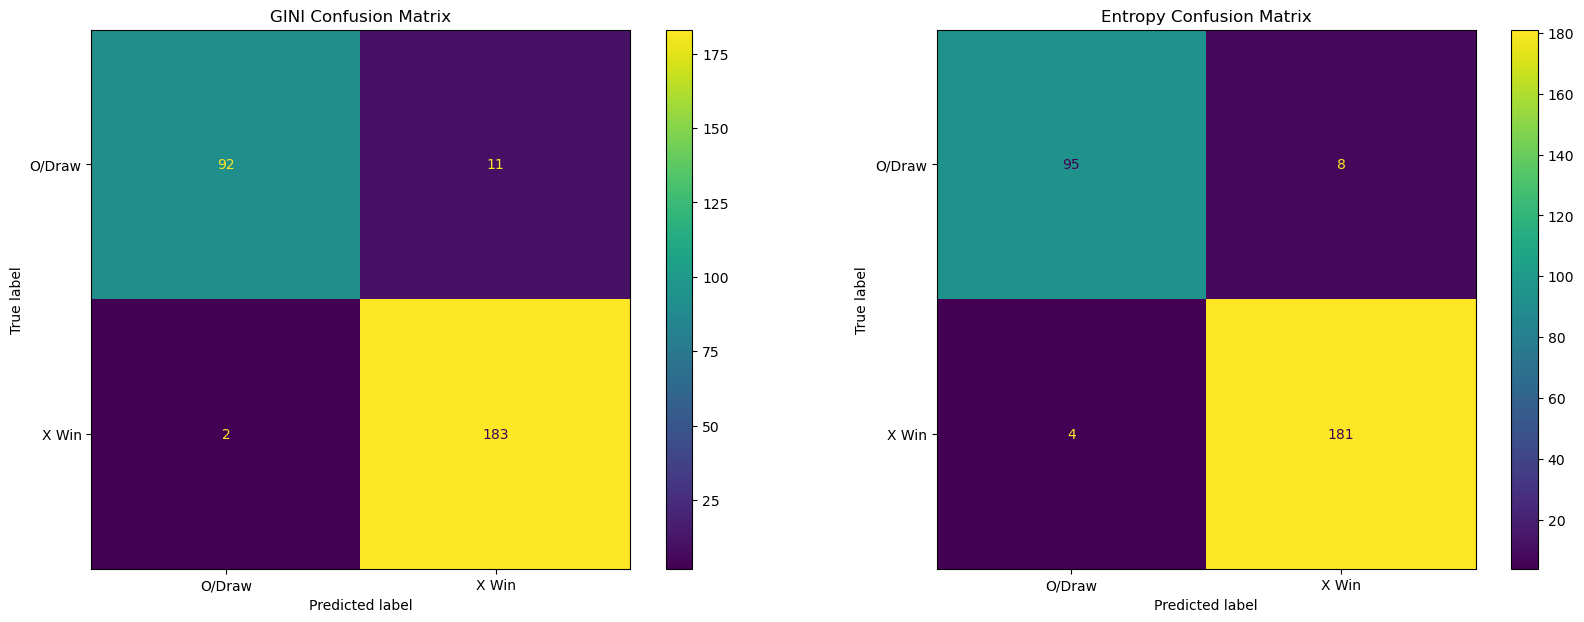

In [97]:
gini_tree_confusion = confusion_matrix(y_test, gini_tree_predict)
entropy_tree_confusion = confusion_matrix(y_test, entropy_tree_predict)

gini_matrix = ConfusionMatrixDisplay(gini_tree_confusion, display_labels=class_labels)
entropy_matrix = ConfusionMatrixDisplay(entropy_tree_confusion, display_labels=class_labels)

fig, axes = plt.subplots(ncols=2)

axes[0].set_title('GINI Confusion Matrix')
axes[1].set_title('Entropy Confusion Matrix')

gini_matrix.plot(ax=axes[0], )
entropy_matrix.plot(ax=axes[1])
plt.show()

Both GINI and Entropy Trees seem to have similar accuracy, so either tree could be used for the decision tree visualizer, but we will be using the GINI Tree.

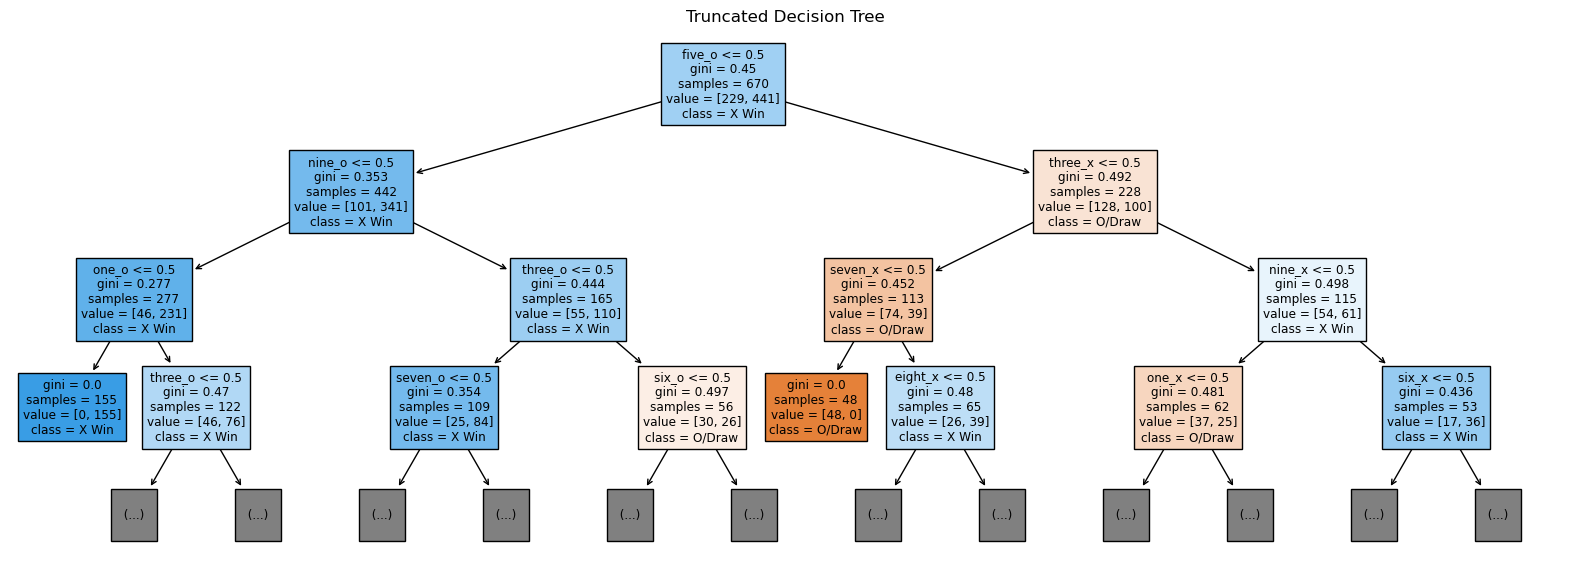

In [99]:
from sklearn.tree import plot_tree
from matplotlib import rcParams

features = X.columns

rcParams['figure.figsize'] = (20, 7)

short = plot_tree(gini_tree, filled=True, feature_names=features, max_depth=3, class_names=class_labels)

plt.title('Truncated Decision Tree')
plt.show(short)

In [100]:
full = plot_tree(gini_tree, filled=True, feature_names=features, class_names=class_labels)

rcParams['figure.figsize'] = (20, 10)

img_name = 'decision_tree.png'

plt.title('Full Decision Tree')
plt.savefig(img_name, dpi=300)
plt.close()

print(f'Saved to: {img_name}')

Saved to: decision_tree.png


As shown in the decision trees, the more orange predictions/nodes are when the model is more confident that the O-player will win or the two players draw, and the more blue predictions/nodes are when the model is more confident that the X-player will win.

In [ ]:
rcParams['figure.figsize'] = (6.4, 4.8)